---

# Machine Learning com KMeans

### Objetivo

Em um mundo cada vez mais orientado por dados, a capacidade de identificar padrões ocultos em grandes volumes de informações é essencial para tomadas de decisão inteligentes. Entre as técnicas de aprendizado de máquina, os algoritmos de clusterização têm se destacado por permitir a descoberta de agrupamentos naturais sem a necessidade de rótulos prévios.

Este projeto tem como foco a aplicação do algoritmo KMeans, um método de Machine Learning não supervisionado, para analisar um conjunto de dados contendo altura, peso e gênero de indivíduos. A motivação central está em compreender como características físicas podem se agrupar de maneira natural e como esses agrupamentos se relacionam com informações demográficas.

Além de consolidar o entendimento prático do pipeline de aprendizado de máquina — desde a análise exploratória até a visualização dos resultados — o trabalho também visa desenvolver a capacidade crítica de avaliar a qualidade dos agrupamentos obtidos e suas implicações.

---


## 1. Importação e Análise Exploratória

Vamos começar importando as bibliotecas necessárias e carregando o dataset.


In [2]:
# Bibliotecas principais utilizadas no projeto
import pandas as pd                # Manipulação e análise de dados
import numpy as np                 # Operações matemáticas e numéricas
import matplotlib.pyplot as plt    # Visualizações básicas
import seaborn as sns              # Visualizações estatísticas avançadas

# Ignorando mensagens de alerta para manter o notebook limpo
import warnings
warnings.filterwarnings("ignore")

# Upload manual do arquivo CSV (caso esteja usando Colab)
from google.colab import files
uploaded = files.upload()  # Permite ao usuário enviar o arquivo .csv manualmente

# Carregando o dataset CSV
df = pd.read_csv('/content/archive (1).zip')  # Substitua pelo nome correto se o arquivo for diferente
df.head()  # Exibe as 5 primeiras linhas do dataset


Saving archive (1).zip to archive (1) (1).zip


,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [3]:
# Exibindo estatísticas descritivas das variáveis numéricas
df.describe()


,Height,Weight
count,8555.000000,8555.000000
mean,66.809925,165.632735
std,3.851454,32.043922
min,54.616858,65.780000
25%,63.957684,139.876803
50%,66.985923,168.521567
75%,69.604427,190.666305
max,80.450000,269.989698


In [4]:
# Verificando estrutura do dataset e valores ausentes
df.info()            # Mostra tipos de dados e quantidade de entradas por coluna
df.isnull().sum()    # Verifica se há valores nulos em cada coluna


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8555 entries, 0 to 8554
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  8555 non-null   object 
 1   Height  8555 non-null   float64
 2   Weight  8555 non-null   float64
dtypes: float64(2), object(1)
memory usage: 200.6+ KB


,0
Gender,0
Height,0
Weight,0


---

### 1. Importação e Análise Exploratória

Nesta primeira etapa, iniciamos o projeto com:

- A importação das bibliotecas necessárias para análise, visualização e pré-processamento de dados.
- O carregamento do arquivo `WeightHeight.csv`, que contém informações sobre **altura, peso e gênero** de indivíduos.
- A visualização inicial com `head()` permite entender a estrutura básica do dataset.

Em seguida, realizamos uma **análise exploratória básica**:

- `describe()` nos dá estatísticas como média, desvio padrão, valores mínimos e máximos para as colunas numéricas.
- `info()` mostra os tipos de dados e a quantidade de entradas por coluna.
- `isnull().sum()` verifica se existem valores ausentes no dataset (nesse caso, não há valores nulos).

Essas verificações são fundamentais antes de qualquer modelagem, garantindo que os dados estejam em um estado confiável para o aprendizado de máquina.

---


## 2. Pré-processamento

Vamos codificar o gênero e padronizar os dados com StandardScaler.


In [5]:
# Importando as classes para codificação de variáveis categóricas e padronização dos dados
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Codificando a coluna 'Gender' para valores numéricos (Male = 1, Female = 0)
le = LabelEncoder()                     # Cria o codificador
df['Gender'] = le.fit_transform(df['Gender'])  # Aplica a codificação à coluna 'Gender'

# Separando as features (variáveis independentes) em uma nova variável X
X = df[['Gender', 'Height', 'Weight']]  # Seleciona as colunas relevantes para o modelo

# Padronizando os dados (transformando para média 0 e desvio padrão 1)
scaler = StandardScaler()              # Cria o objeto de padronização
X_scaled = scaler.fit_transform(X)     # Aplica a transformação nos dados de X


---

### 2. Pré-processamento dos Dados

Nesta etapa, vamos preparar os dados para o modelo de Machine Learning:

- **Codificação de Gênero**: A variável `Gender` é categórica (Male ou Female), então usamos o `LabelEncoder` para transformá-la em valores numéricos (Male = 1, Female = 0). Isso é necessário porque algoritmos de machine learning não trabalham diretamente com texto.

- **Seleção de Features**: Selecionamos as colunas `Gender`, `Height` e `Weight` como variáveis independentes (features) que serão utilizadas no modelo. Essa matriz de entrada é armazenada na variável `X`.

- **Padronização**: Para garantir que todas as variáveis tenham a **mesma escala** (fundamental para o bom desempenho do KMeans), aplicamos o `StandardScaler`, que transforma os dados para que tenham média 0 e desvio padrão 1.

---

## 3. Aplicando KMeans e Escolha do Melhor k


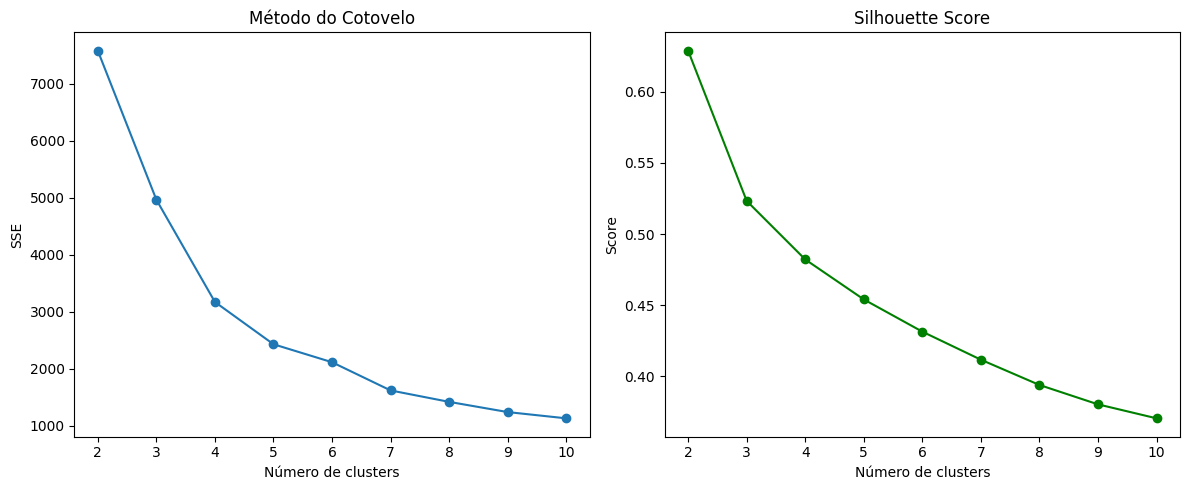

In [6]:
# Importando o algoritmo KMeans e a métrica Silhouette Score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Listas para armazenar o SSE (soma dos erros quadráticos) e os scores de Silhouette
sse = []
silhouette_scores = []

# Testando valores de k (número de clusters) de 2 a 10
k_values = range(2, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)   # Cria o modelo KMeans com k clusters
    kmeans.fit(X_scaled)                             # Treina o modelo com os dados escalonados
    sse.append(kmeans.inertia_)                      # Armazena o SSE (inércia)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))  # Armazena o score de Silhouette

# Gráfico do Método do Cotovelo (SSE)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_values, sse, marker='o')
plt.title('Método do Cotovelo')
plt.xlabel('Número de clusters')
plt.ylabel('SSE')

# Gráfico do Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o', color='green')
plt.title('Silhouette Score')
plt.xlabel('Número de clusters')
plt.ylabel('Score')

plt.tight_layout()
plt.show()

In [7]:
# Treinando o KMeans com o melhor valor de k identificado (neste caso, 2)
best_k = 2
kmeans = KMeans(n_clusters=best_k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)  # Obtém os rótulos de cluster para cada ponto
df['Cluster'] = clusters  # Adiciona os rótulos como nova coluna no DataFrame

---

### 3. Aplicando o KMeans e Determinando o Melhor Número de Clusters

Nesta etapa, aplicamos o algoritmo de **KMeans** para realizar a clusterização dos dados. Como não sabemos previamente o número ideal de clusters, usamos duas abordagens:

- **Método do Cotovelo (Elbow Method)**: Avalia a soma dos erros quadráticos dentro dos clusters (SSE). À medida que aumentamos o número de clusters, o erro diminui, mas chega um ponto em que a melhoria se torna irrelevante — esse "cotovelo" indica o melhor valor de `k`.

- **Silhouette Score**: Mede o quão bem cada ponto está agrupado dentro do seu cluster. Scores mais altos indicam melhores agrupamentos.

Para isso, testamos valores de `k` de 2 a 10. Em cada iteração:
- Treinamos um modelo KMeans.
- Armazenamos a inércia (SSE).
- Calculamos o **Silhouette Score**.

Depois dos testes, decidimos usar `k = 2` como o número ideal de clusters, baseado na análise dos gráficos.

- Finalmente, o modelo KMeans é treinado com `k = 2`, e os rótulos de cluster são adicionados como uma nova coluna chamada `Cluster` no DataFrame original.

---


## 4. Análise dos Resultados

Vamos comparar os clusters com os gêneros reais.


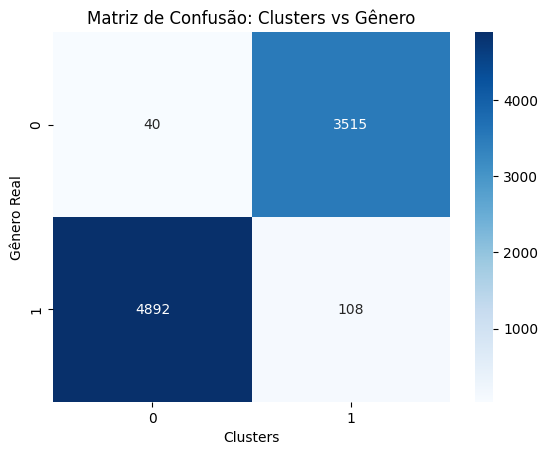

In [8]:
# Importando a função para criar a matriz de confusão
from sklearn.metrics import confusion_matrix

# Criando a matriz de confusão entre os valores reais de gênero e os rótulos de cluster
conf_matrix = confusion_matrix(df['Gender'], df['Cluster'])

# Visualizando a matriz de confusão com um mapa de calor
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Clusters')        # Rótulo do eixo X
plt.ylabel('Gênero Real')     # Rótulo do eixo Y
plt.title('Matriz de Confusão: Clusters vs Gênero')  # Título do gráfico
plt.show()

In [9]:
# Analisando a média de altura e peso em cada cluster formado
df.groupby('Cluster')[['Height', 'Weight']].mean()

,Height,Weight
Cluster,,
0,69.190097,188.000434
1,63.569791,135.183525


---

### 4. Avaliando os Resultados da Clusterização

Para verificar se os clusters formados pelo KMeans fazem sentido em relação ao **gênero real** das pessoas (Male ou Female), realizamos duas análises complementares:

#### 1. Matriz de Confusão
- Comparamos os **valores reais de gênero** (`Gender`) com os **rótulos de cluster atribuídos** (`Cluster`).
- O gráfico gerado é um **heatmap**, que permite visualizar se os dados foram bem agrupados.
- Como o KMeans é um algoritmo **não supervisionado**, ele pode trocar os rótulos dos grupos (ex: chamar o grupo 0 de 1), mas ainda assim conseguimos avaliar a separação.

#### 2. Análise Estatística dos Clusters
- Usamos `groupby` para calcular a **média de altura e peso** de cada cluster.
- Isso nos ajuda a entender as **características predominantes** de cada grupo.
- Por exemplo, se um cluster apresenta média de altura e peso significativamente maior, ele pode corresponder ao grupo de indivíduos do gênero masculino.

Essas duas análises nos ajudam a interpretar se a clusterização teve **coerência prática** com os dados reais.

---


## 5. Visualização dos Clusters


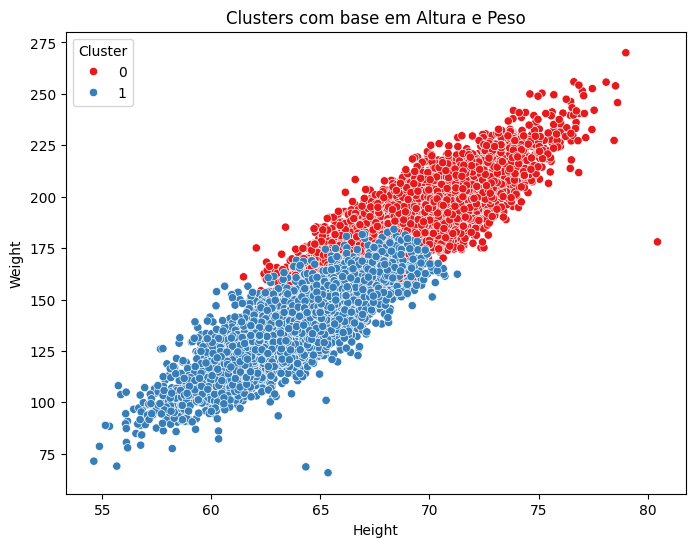

In [10]:
# Scatter Plot com altura e peso, colorido pelos clusters
plt.figure(figsize=(8, 6))  # Define o tamanho do gráfico
sns.scatterplot(data=df, x='Height', y='Weight', hue='Cluster', palette='Set1')  # Cria gráfico com cores diferentes por cluster
plt.title('Clusters com base em Altura e Peso')  # Título do gráfico
plt.show()


---

### 5. Visualização dos Clusters

Aqui criamos um **gráfico de dispersão (scatter plot)** para visualizar como os clusters estão distribuídos com base nas variáveis originais `Height` e `Weight`.

- Cada ponto representa uma pessoa do dataset.
- As cores representam os diferentes **clusters** atribuídos pelo algoritmo KMeans.
- Isso nos ajuda a perceber se houve alguma separação visual clara entre os grupos.

Mesmo sem usar redução de dimensionalidade, já conseguimos observar alguma estrutura nos dados.

---


## 6. PCA – Redução de Dimensionalidade


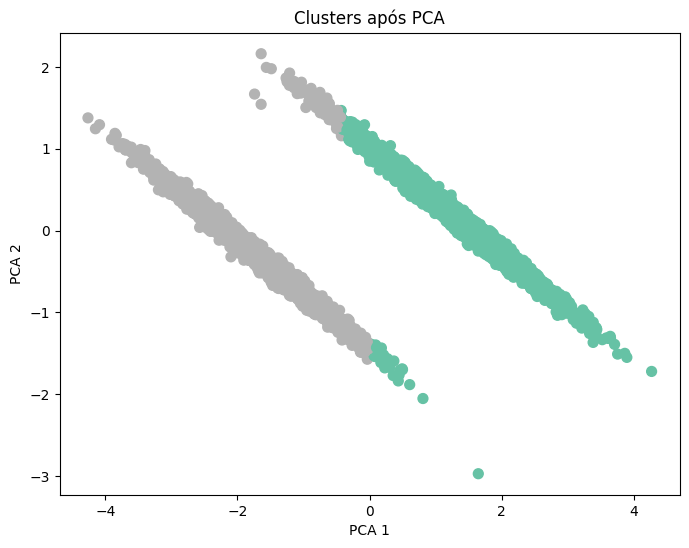

In [11]:
from sklearn.decomposition import PCA

# Reduzindo para 2 dimensões
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Aplicando KMeans no espaço PCA
kmeans_pca = KMeans(n_clusters=best_k, random_state=42)
clusters_pca = kmeans_pca.fit_predict(X_pca)

# Visualização
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters_pca, cmap='Set2', s=50)
plt.title('Clusters após PCA')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()


---

### 6. PCA – Redução de Dimensionalidade

O PCA (**Análise de Componentes Principais**) é uma técnica usada para **reduzir a quantidade de variáveis** do dataset, mantendo o máximo possível de informação.

- Aplicamos PCA para transformar nosso dataset de 3 variáveis (`Gender`, `Height`, `Weight`) para apenas **2 componentes principais** (`PCA 1` e `PCA 2`).
- Em seguida, aplicamos novamente o algoritmo KMeans sobre esse novo espaço reduzido.
- Por fim, visualizamos os novos clusters em um gráfico 2D com base nessas duas componentes.

Essa abordagem é útil especialmente para visualização e também pode melhorar o desempenho de alguns modelos ao remover ruído dos dados originais.

---


---

### Conclusão Final

A partir da aplicação do algoritmo **KMeans** no dataset de altura, peso e gênero, foi possível agrupar os dados em dois clusters com **boa separação entre os grupos**. A análise revelou os seguintes pontos principais:

- O **número ideal de clusters** foi definido como `k = 2`, com base no **método do cotovelo** e no **silhouette score**, ambos apontando uma divisão coerente.
- A **matriz de confusão** demonstrou que os clusters formados possuem boa correspondência com os gêneros reais, mesmo o modelo sendo não supervisionado.
- A análise estatística dos clusters mostrou **diferenças claras de altura e peso médios** entre os grupos, sugerindo que o modelo conseguiu identificar padrões relevantes nos dados.
- A **visualização com PCA** reforçou a separação entre os clusters, facilitando a interpretação visual do modelo.

Em resumo, o modelo KMeans se mostrou eficiente para este tipo de dado, e a aplicação de técnicas de pré-processamento e visualização foi essencial para interpretar os resultados.

---
